In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
# Load your dataset
df = pd.read_csv('C:/Users/vinay/Downloads/archive/sentiment reviews dataset.csv')


In [33]:
# Preview the data
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Serial Number      397 non-null    int64 
 1   market_place       397 non-null    object
 2   customer_id        397 non-null    object
 3   review_id          397 non-null    object
 4   product_id         397 non-null    object
 5   product_parent     397 non-null    object
 6   product_category   397 non-null    object
 7   star_rating        397 non-null    int64 
 8   helpful_votes      397 non-null    int64 
 9   total_votes        397 non-null    int64 
 10  vine               397 non-null    object
 11  verified_purchase  397 non-null    object
 12  review_date        397 non-null    object
 13  Review             397 non-null    object
 14  Sentiment          397 non-null    object
dtypes: int64(4), object(11)
memory usage: 46.7+ KB
None
   Serial Number market_place customer_

C:\Users\vinay\AppData\Local\Temp\ipykernel_3996\2675300948.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='viridis')


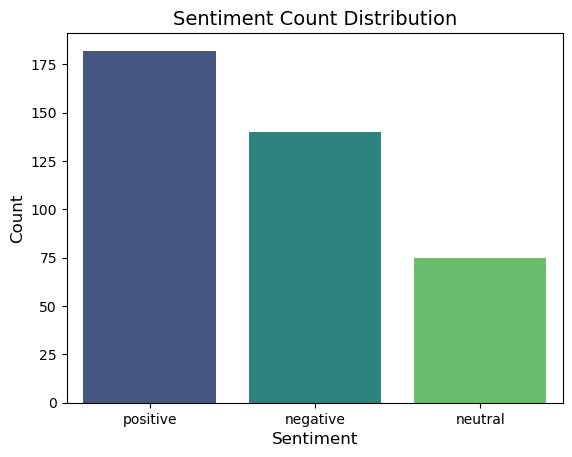

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting a bar plot for 'Sentiment' column
sns.countplot(data=df, x='Sentiment', palette='viridis')
plt.title('Sentiment Count Distribution', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


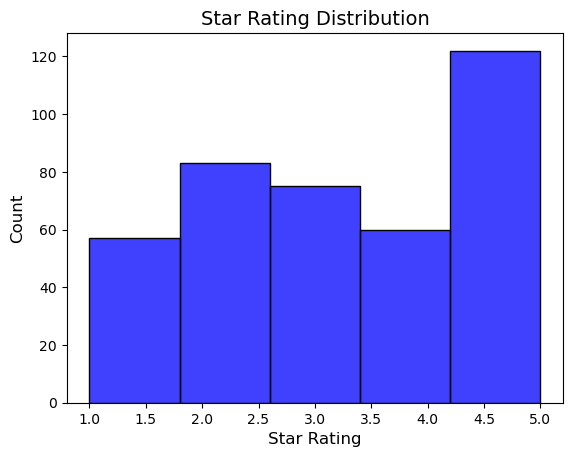

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting a histogram for 'star_rating' column
sns.histplot(df['star_rating'], bins=5, kde=False, color='blue')
plt.title('Star Rating Distribution', fontsize=14)
plt.xlabel('Star Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


C:\Users\vinay\AppData\Local\Temp\ipykernel_3996\2053333814.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Sentiment', y='helpful_votes', palette='pastel')


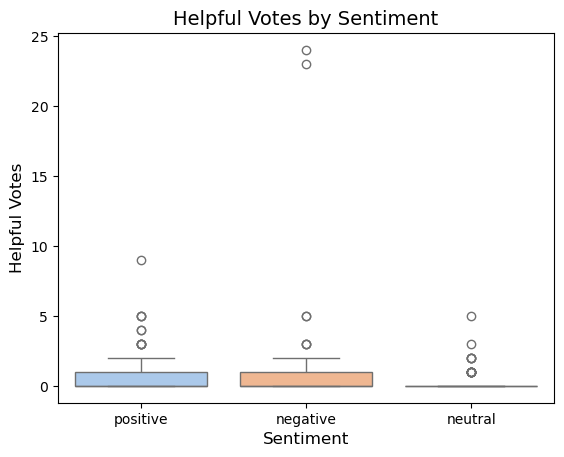

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot of 'helpful_votes' by 'Sentiment'
sns.boxplot(data=df, x='Sentiment', y='helpful_votes', palette='pastel')
plt.title('Helpful Votes by Sentiment', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Helpful Votes', fontsize=12)
plt.show()


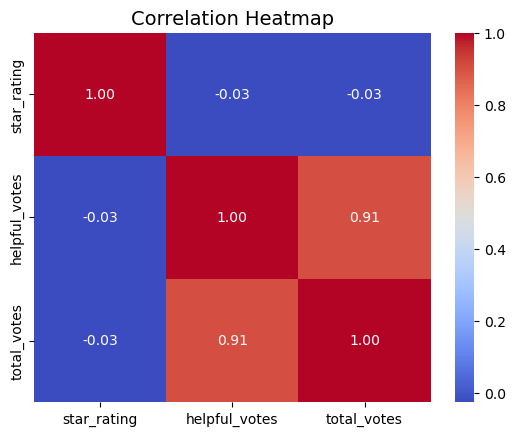

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating correlation matrix
corr = df[['star_rating', 'helpful_votes', 'total_votes']].corr()

# Plotting the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=14)
plt.show()


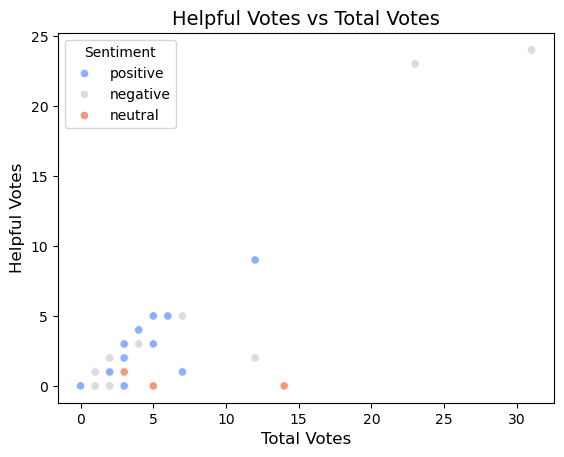

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of 'total_votes' vs 'helpful_votes', colored by 'Sentiment'
sns.scatterplot(data=df, x='total_votes', y='helpful_votes', hue='Sentiment', palette='coolwarm')
plt.title('Helpful Votes vs Total Votes', fontsize=14)
plt.xlabel('Total Votes', fontsize=12)
plt.ylabel('Helpful Votes', fontsize=12)
plt.legend(title='Sentiment')
plt.show()


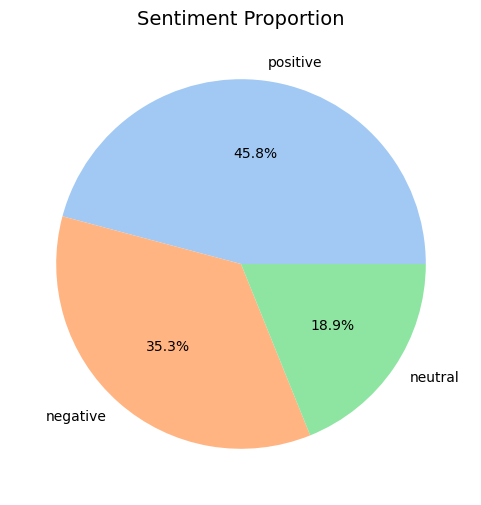

In [39]:
import matplotlib.pyplot as plt

# Calculate sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Sentiment Proportion', fontsize=14)
plt.show()


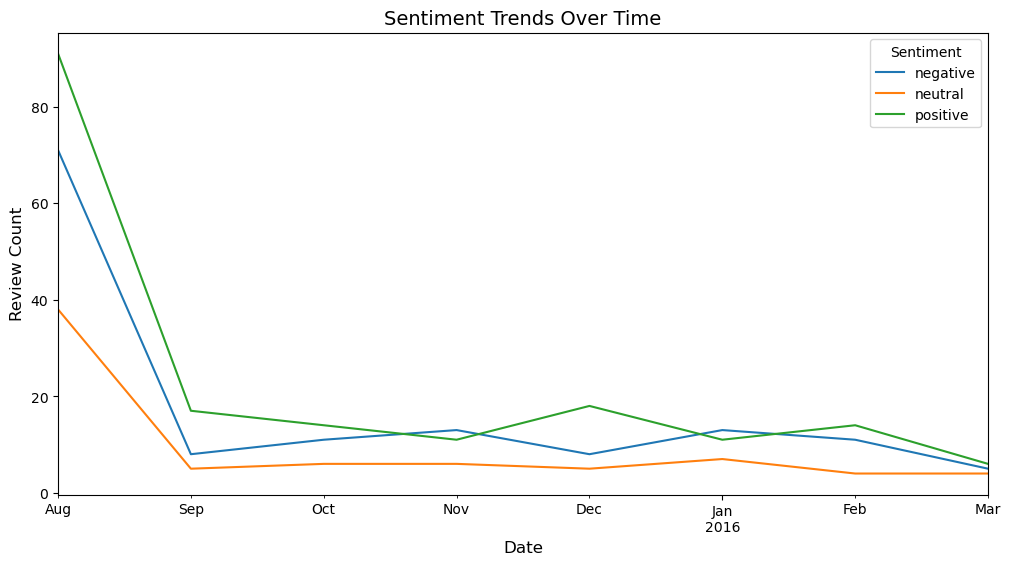

In [40]:
import matplotlib.pyplot as plt

# Convert review_date to datetime if not already
df['review_date'] = pd.to_datetime(df['review_date'], dayfirst=True)

# Group by month and sentiment, then count occurrences
sentiment_over_time = df.groupby([df['review_date'].dt.to_period('M'), 'Sentiment']).size().unstack()

# Plotting the sentiment trend over time
sentiment_over_time.plot(kind='line', figsize=(12, 6))
plt.title('Sentiment Trends Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Review Count', fontsize=12)
plt.legend(title='Sentiment')
plt.show()


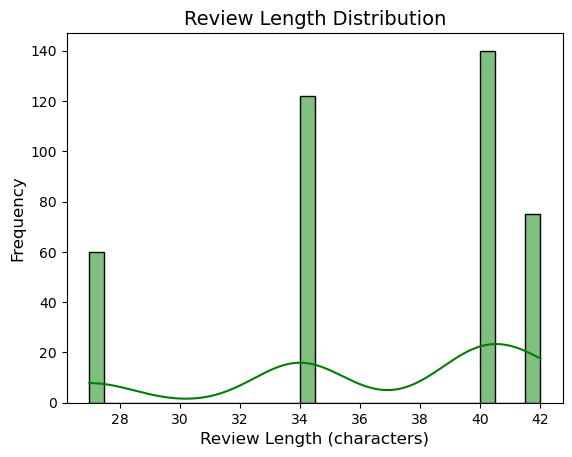

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the length of each review
df['review_length'] = df['Review'].str.len()

# Plotting the review length distribution
sns.histplot(df['review_length'], bins=30, kde=True, color='green')
plt.title('Review Length Distribution', fontsize=14)
plt.xlabel('Review Length (characters)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


C:\Users\vinay\AppData\Local\Temp\ipykernel_3996\2624870544.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sentiment', y='star_rating', data=df, palette='Blues')


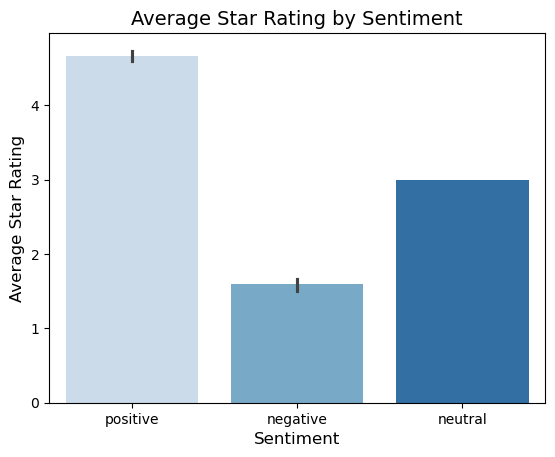

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the bar plot for 'star_rating' by 'Sentiment'
sns.barplot(x='Sentiment', y='star_rating', data=df, palette='Blues')
plt.title('Average Star Rating by Sentiment', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Average Star Rating', fontsize=12)
plt.show()


In [43]:
data = {
    "Review": [
        "This product is amazing!",
        "Terrible experience, not recommended.",
        "It's okay, not great but not bad either.",
        "Absolutely fantastic, loved it!",
        "Waste of money. Really disappointing."
    ],
    "Sentiment": ["Positive", "Negative", "Neutral", "Positive", "Negative"]
}
df = pd.DataFrame(data)

In [44]:
import pandas as ps
import re
from nltk.corpus import stopwords
import nltk

# Sample DataFrame
df = pd.DataFrame({
    'Review': [
        "This is a great product! Highly recommend.",
        "Very bad, would not buy again.",
        "Okay, but could be better. Average quality."
    ]
})

# Clean text data
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text.lower())  # Remove punctuation and lowercase
    text = " ".join(word for word in text.split() if word not in stop_words)  # Remove stopwords
    return text

# Apply text cleaning to the 'Review' column
df['Cleaned_Review'] = df['Review'].apply(clean_text)

# Display the cleaned DataFrame
print(df.head())

                                        Review  \
0   This is a great product! Highly recommend.   
1               Very bad, would not buy again.   
2  Okay, but could be better. Average quality.   

                      Cleaned_Review  
0     great product highly recommend  
1                      bad would buy  
2  okay could better average quality  


In [45]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Example DataFrame
df = pd.DataFrame({
    'Review': [
        "This is a great product! Highly recommend.",
        "Very bad, would not buy again.",
        "Okay, but could be better. Average quality."
    ],
    'Sentiment': ['positive', 'negative', 'neutral']  # Example target variable
})

# Clean the text (use the previously defined clean_text function)
df['Cleaned_Review'] = df['Review'].apply(clean_text)

# Feature extraction with CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Cleaned_Review'])  # Transform cleaned reviews into feature vectors

# Assign target variable
y = df['Sentiment']

# Splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classifier (e.g., Multinomial Naive Bayes)
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       0.0
    positive       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklea

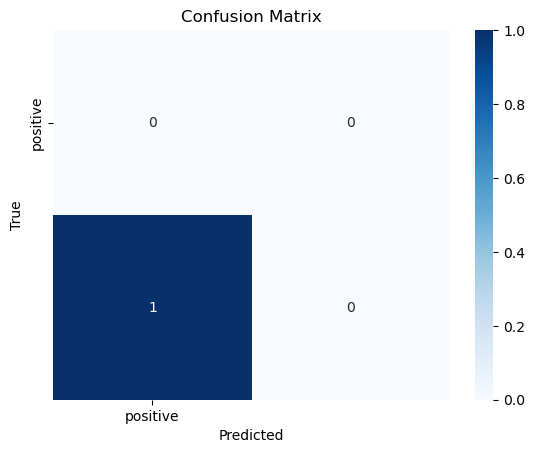

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Assuming y_test and y_pred are already defined
cm = confusion_matrix(y_test, y_pred)

# Extract class labels (model.classes_ if using an sklearn model, otherwise unique labels from y_test)
class_labels = sorted(set(y_test))  # Ensure labels are in sorted order for alignment

# Plot the heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [47]:
# Example new reviews
new_reviews = [
    "I love this product, it's awesome!",
    "Not worth the money.",
    "It's decent for the price."
]

# Clean the new reviews
new_cleaned = [clean_text(review) for review in new_reviews]

# Transform the cleaned reviews using the pre-trained vectorizer
try:
    new_X = vectorizer.transform(new_cleaned)
except NameError:
    print("Error: Ensure 'vectorizer' is defined and trained.")

# Predict sentiment using the trained model
try:
    new_predictions = clf.predict(new_X)  # Replace 'clf' with your trained model
except NameError:
    print("Error: Ensure 'model' or 'clf' is defined and trained.")

# Print the results
for review, sentiment in zip(new_reviews, new_predictions):
    print(f"Review: {review} => Sentiment: {sentiment}")

Review: I love this product, it's awesome! => Sentiment: negative
Review: Not worth the money. => Sentiment: negative
Review: It's decent for the price. => Sentiment: negative
